In [1]:
#Importing Numpy for Scientific Calculation, Matplotlib for Plotting Data & sklearn.metrics for caluclating mean Error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE

In [2]:
#Defining Class LinReg
class LinReg:
    def __init__(self,rate,iteration):
        self.iteration=iteration
        self.rate=rate
        self.parameters=np.zeros((2,1))
    def cost_funct(self):
        self.cost=np.sum(np.square((self.prediction-self.Y))/(2*len(self.Y)))

    def predict(self,X=[],flag=False):
        if flag==False:
            self.prediction=np.dot(self.X,self.parameters)
        else:
            self.prediction=np.dot(X,self.parameters)
    def descent(self):
        q=(self.prediction-self.Y)	
        q=(np.dot(self.X.transpose(),q))
        self.parameters=self.parameters-(self.rate/len(self.Y))*q
    def fit(self,X_train,Y_train):
        X_train=X_train.reshape(len(X_train),1)
        b=np.ones(len(X_train)).reshape(X_train.shape)
        self.X=np.hstack((b,X_train))
        Y_train=Y_train.reshape(len(Y_train),1)
        self.Y=Y_train
        while(self.iteration):
            self.iteration-=1
            self.iterate()
        self.pr()

    def iterate(self):
        self.predict()
        self.cost_funct()
        print("Cost : ",self.cost)
        self.descent()
    def pr(self):
        print("\nParameters : ",self.parameters[0][0],"\t",self.parameters[1][0],"\nCost : ",self.cost)
    def ret_para(self):
        return self.parameters
    def predictions(self,X_test):
        X_test=X_test.reshape(len(X_test),1)
        b=np.ones(len(X_test)).reshape(X_test.shape)
        X_test=np.hstack((b,X_test))
        self.predict(X_test,True)
    def accuracy(self,X_test,Y_test):
        self.predictions(X_test)
        Y_test=Y_test.reshape(len(Y_test),1)
        print("\nMean Absolute Error : ",MAE(Y_test,self.prediction))

In [3]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',color='red',label='Linear Line Fit')


In [4]:
#Importing of Data
print("Linear Regression With One Input Variable/Feature giving univariable Output\n")
data = np.genfromtxt('train.csv', delimiter=',')
data=data[1:,:]
X_train=data[:,0]
Y_train=data[:,1]
data = np.genfromtxt('train.csv', delimiter=',')
test = np.genfromtxt('test.csv', delimiter=',')
test=test[1:,:]
X_test=test[:,0]
Y_test=test[:,1]


Linear Regression With One Input Variable/Feature giving univariable Output



In [5]:
#Setting Learning Rate lr & no of iteration
lr=0.0005
iteration=100


In [6]:
#Creating of obj of LinReg class
obj=LinReg(lr,iteration)
obj.fit(X_train,Y_train)


Cost :  1668.3262288672486
Cost :  746.9973996821388
Cost :  335.67652843642156
Cost :  152.0451756285452
Cost :  70.06423042595227
Cost :  33.464405255686785
Cost :  17.12466663017925
Cost :  9.829903239101366
Cost :  6.573206359318984
Cost :  5.119276289552348
Cost :  4.470178968919687
Cost :  4.180393651680376
Cost :  4.051020688382696
Cost :  3.9932627089148482
Cost :  3.967476742761249
Cost :  3.9559644604632416
Cost :  3.950824565484427
Cost :  3.948529578742544
Cost :  3.9475046816469286
Cost :  3.9470468073513434
Cost :  3.946842076534557
Cost :  3.946750359948791
Cost :  3.9467090978624526
Cost :  3.946690360916901
Cost :  3.9466816802434996
Cost :  3.946677489202238
Cost :  3.946675302605239
Cost :  3.9466740109575786
Cost :  3.9466731189329156
Cost :  3.946672405396219
Cost :  3.9466717716232673
Cost :  3.9466711735392956
Cost :  3.94667059146741
Cost :  3.9466700166229787
Cost :  3.946669445084144
Cost :  3.9466688750999994
Cost :  3.9466683058888448
Cost :  3.9466677371016

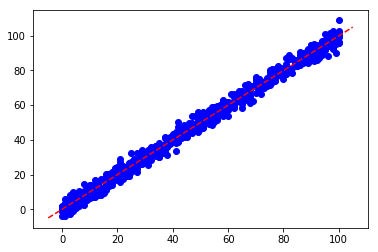

In [7]:
#Plotting X_Train & Y_Train with Predicticted Linear Fitting
plt.scatter(X_train,Y_train,color='blue',label='Training Data')
plt.legend()
a=obj.ret_para()
abline(a[1,0],a[0,0])

In [8]:
#Finding Object Accuracy Using Test Set
#X_test ,Y_test
obj.accuracy(X_test,Y_test)


Mean Absolute Error :  2.418865312831772


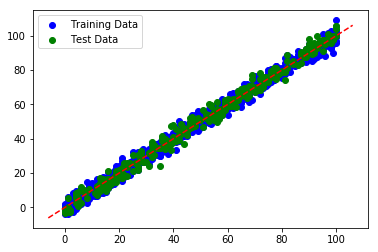

In [15]:
#Plotting X_test & Y_test
plt.scatter(X_train,Y_train,color='blue',label='Training Data')
plt.scatter(X_test,Y_test,c='g',label='Test Data')
plt.legend()
abline(a[1,0],a[0,0])